<a href="https://colab.research.google.com/github/snr-019/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PREDICTION USING SUPERVISED ML (Linear Regression)

###AIM : To predict the percentage score of a student based on the number of study hours.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Data Sets/student_scores.csv")

In [4]:
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.duplicated().any()

False

###Exploratary Data Analysis

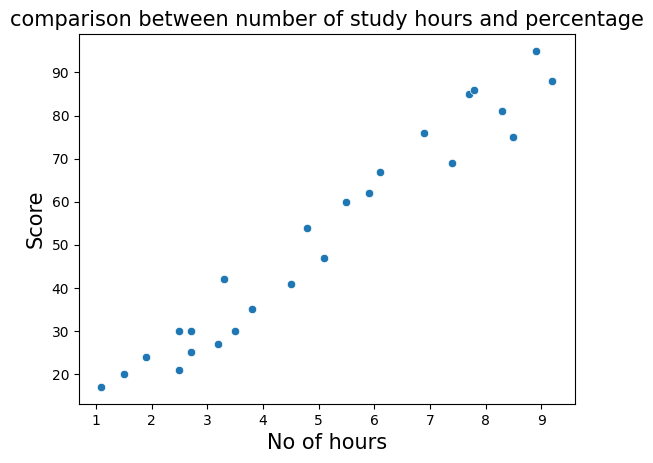

In [9]:
plt.xlabel('No of hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title("comparison between number of study hours and percentage",fontsize=15)
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.show()

The maximum score is 8.9

<Axes: title={'center': 'comparison between number of study hours and percentage'}, xlabel='No of hours', ylabel='Score'>

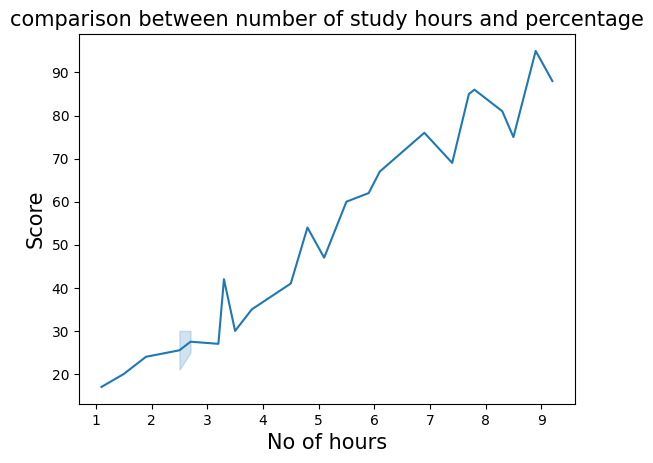

In [10]:
plt.xlabel('No of hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.title("comparison between number of study hours and percentage",fontsize=15)
sns.lineplot(x='Hours',y='Scores',data=df)

we can see that when the number of hours increases the score will also increases,they are directly propotional.Suggesting that more study hours lead to improved perfomance.

###Model Training

In [11]:
#Seperate Features And Target Variable
x=df.drop('Scores',axis=1)
y=df.Scores
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [12]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
# Model training
model = LinearRegression()
model.fit(x_train, y_train)
print("Training completed")

Training completed


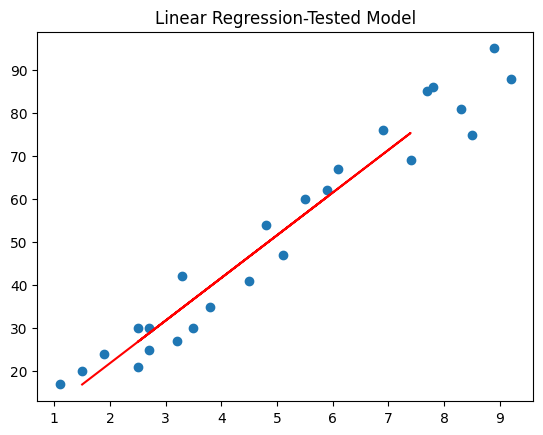

In [30]:
# Plotting for test data
plt.scatter(x, y)
# plt.plot(x, color="red")
plt.plot(x_test, y_pred, color='red')
plt.title('Linear Regression-Tested Model')
plt.show()

In [17]:
#Checking model accuracy on training data
model.score(x_train,y_train)

0.9515510725211552

In [19]:
#Checking model accuracy on testing data
model.score(x_test,y_test)

0.9454906892105354

In [18]:
#predict the value for test dataset
y_pred=model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [25]:
#compairing actual and predicted value
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


<ipython-input-20-38821bcf4eb8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred,color='red',shade=True,label='Predicted')
<ipython-input-20-38821bcf4eb8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test,color='blue',shade=True,label='Actual')


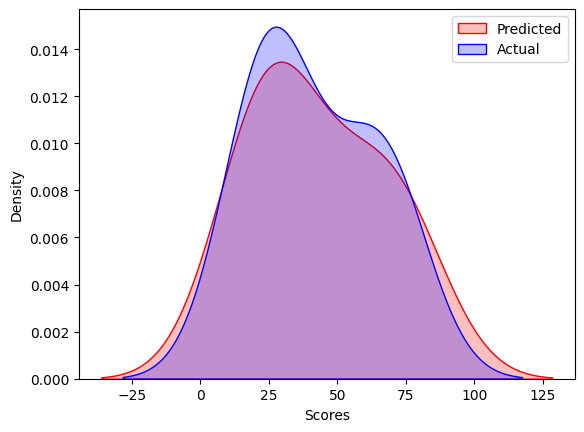

In [20]:
#Actual Vs Predicted distribution plot
sns.kdeplot(y_pred,color='red',shade=True,label='Predicted')
sns.kdeplot(y_test,color='blue',shade=True,label='Actual')
plt.legend()

**Prediction of new data**

In [22]:
# Predicting the score for a student who studies for 9.25 hours per day
given_hours = 9.25
predicted = model.predict([[given_hours]])
print("Number of hours =", given_hours)
print("Predicted score is =", predicted[0])

Number of hours = 9.25
Predicted score is = 93.69173248737539


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.183859899002982


In [24]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:",mse)
print("R-squared:",r2)

Mean Squared Error: 21.598769307217456
R-squared: 0.9454906892105354
